<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('heart.csv')

In [9]:
print(df)

     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]


In [12]:
y = df.iloc[:,-1:]
x = df.iloc[:,:11]

In [13]:
print(y)
print(x)

     HeartDisease
0               0
1               1
2               0
3               1
4               0
..            ...
913             1
914             1
915             1
916             1
917             0

[918 rows x 1 columns]
     Age Sex ChestPainType  RestingBP  ...  MaxHR  ExerciseAngina Oldpeak  ST_Slope
0     40   M           ATA        140  ...    172               N     0.0        Up
1     49   F           NAP        160  ...    156               N     1.0      Flat
2     37   M           ATA        130  ...     98               N     0.0        Up
3     48   F           ASY        138  ...    108               Y     1.5      Flat
4     54   M           NAP        150  ...    122               N     0.0        Up
..   ...  ..           ...        ...  ...    ...             ...     ...       ...
913   45   M            TA        110  ...    132               N     1.2      Flat
914   68   M           ASY        144  ...    141               N     3.4      Flat
915 

In [49]:
x = pd.get_dummies(x)

In [50]:
print(x)

     Age  RestingBP  Cholesterol  ...  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0     40        140          289  ...              0              0            1
1     49        160          180  ...              0              1            0
2     37        130          283  ...              0              0            1
3     48        138          214  ...              0              1            0
4     54        150          195  ...              0              0            1
..   ...        ...          ...  ...            ...            ...          ...
913   45        110          264  ...              0              1            0
914   68        144          193  ...              0              1            0
915   57        130          131  ...              0              1            0
916   57        130          236  ...              0              1            0
917   38        138          175  ...              0              0            1

[918 rows x 20 columns]


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.iloc[:,:6] = sc.fit_transform(x_train.iloc[:,:6])
x_test.iloc[:,:6] = sc.transform(x_test.iloc[:,:6])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1]


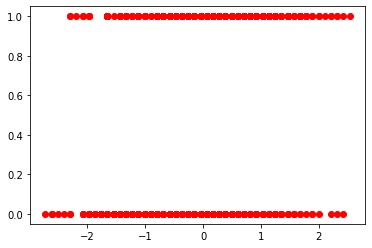

In [90]:
plt.scatter(x_train.iloc[:,0],y_train,color='red')

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 64  10]
 [  9 101]]


0.8967391304347826